<a href="https://colab.research.google.com/github/jaehyun0220/Colab/blob/master/jigsaw_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# 데이터 활용에 필요한 기본 패키지 로딩
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

import keras
print("keras version: {}".format(keras.__version__))

import os
#import io

Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
pandas version: 0.24.2
scikit-learn version: 0.21.1
NumPy version: 1.16.3
tensorflow version: 1.13.1
keras version: 2.2.4


In [0]:
#데이터 전처리 관련 라이브러리 로드
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit

# Deep Learning Model 로드
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.wrappers.scikit_learn import KerasClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#HyperParameter Tuning을 위한 라이브러리 로드
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#모델 평가를 위한 라이브러리 로드
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn import model_selection

#수학 & 통계 관련 라이브러리 로드
import scipy.stats as st
from collections import Counter

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Auth 인증 및 Google Drive 활용 Data load
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# Google Drive 내 Custom Class 경로 지정
import sys
sys.path.insert(0, '/gdrive/My Drive/CustomClasses')

Mounted at /gdrive


In [0]:
# from google.colab import files
# files.upload()
# !cp ./kaggle.json /root/.kaggle/kaggle.json
# !cp ./kaggle.json /gdrive/My\ Drive/kaggle/kaggle.json

In [32]:
# kaggle 실행을 위한 json file copy & 권한 부여
!mkdir /root/.kaggle
!cp /gdrive/My\ Drive/kaggle/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!cat /root/.kaggle/kaggle.json
# !cat /gdrive/My\ Drive/CustomClasses/.kaggle/kaggle.json
# !kaggle competitions list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
{"username":"claypark","key":"bb187008d01e8abfeaabdb973ebfa7a9"}

In [33]:
# !ls /gdrive/My\ Drive/kaggle
!ls /gdrive/My\ Drive/kaggle/jigsaw

sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [0]:
# Kaggle Competition Data Download - JIGSAW competition

# Directory 생성 후 데이터 다운로드
# !mkdir /gdrive/My\ Drive/kaggle/jigsaw  
# !kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification -p /gdrive/My\ Drive/kaggle/jigsaw 

# 파일 확인 후 각각 unzip 후 zip 파일 삭제
# !ls /gdrive/My\ Drive/kaggle/jigsaw
# !unzip /gdrive/My\ Drive/kaggle/jigsaw/train.csv.zip -d /gdrive/My\ Drive/kaggle/jigsaw
# !unzip /gdrive/My\ Drive/kaggle/jigsaw/test.csv.zip -d /gdrive/My\ Drive/kaggle/jigsaw
# !unzip /gdrive/My\ Drive/kaggle/jigsaw/sample_submission.csv.zip -d /gdrive/My\ Drive/kaggle/jigsaw
# !rm /gdrive/My\ Drive/kaggle/jigsaw/*.zip

# !rm /gdrive/My\ Drive/kaggle/jigsaw/*.csv
# !ls /gdrive/My\ Drive/kaggle/jigsaw

In [35]:
!ls /gdrive/My\ Drive/data

crawl-300d-2M.vec    sample_submission.csv  train.csv
glove.840B.300d.txt  test.csv


# **EDA**

필요한 Package Load 및 학습 데이터 Load

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
train = pd.read_csv('/gdrive/My Drive/kaggle/jigsaw/train.csv.zip', encoding='utf-8')
test = pd.read_csv('/gdrive/My Drive/kaggle/jigsaw/test.csv.zip', encoding='utf-8')
sub = pd.read_csv('/gdrive/My Drive/kaggle/jigsaw/sample_submission.csv.zip', encoding='utf-8')

In [37]:
# 데이터 정상 Load 확인
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47


In [92]:
print(train.isnull().any())
print(test.isnull().any())

id                                     False
target                                 False
comment_text                           False
severe_toxicity                        False
obscene                                False
identity_attack                        False
insult                                 False
threat                                 False
asian                                   True
atheist                                 True
bisexual                                True
black                                   True
buddhist                                True
christian                               True
female                                  True
heterosexual                            True
hindu                                   True
homosexual_gay_or_lesbian               True
intellectual_or_learning_disability     True
jewish                                  True
latino                                  True
male                                    True
muslim    

In [46]:
print("Train null value counts are \n {}".format(train.isnull().sum()))
print("Train total length is ", len(train))
print("-"*50)
print("Test null value counts are \n {}".format(test.isnull().sum()))
print("Test total length is ", len(test))
print("-"*50)
print("Submission total length is ", len(sub))

Train null value counts are 
 id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                        

In [0]:
# Mini Size Test용 Dataset 생성
train_mini = train[:1000]
test_mini = test[:1000]
sub_mini = sub[:1000]

In [50]:
# Null값이 있는 컬럼 체크 후 Null 개수 출력
for col in train_mini:
   if train_mini[col].isnull().sum() > 0:
      print("column: {:20} \t # of null value {:3} \t dtype {}".format(col, train_mini[col].isnull().sum(), train_mini[col].dtype))

column: asian                	 # of null value 834 	 dtype float64
column: atheist              	 # of null value 834 	 dtype float64
column: bisexual             	 # of null value 834 	 dtype float64
column: black                	 # of null value 834 	 dtype float64
column: buddhist             	 # of null value 834 	 dtype float64
column: christian            	 # of null value 834 	 dtype float64
column: female               	 # of null value 834 	 dtype float64
column: heterosexual         	 # of null value 834 	 dtype float64
column: hindu                	 # of null value 834 	 dtype float64
column: homosexual_gay_or_lesbian 	 # of null value 834 	 dtype float64
column: intellectual_or_learning_disability 	 # of null value 834 	 dtype float64
column: jewish               	 # of null value 834 	 dtype float64
column: latino               	 # of null value 834 	 dtype float64
column: male                 	 # of null value 834 	 dtype float64
column: muslim               	 # of null v

# **SIMPLE LSTM**

In [0]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, Dropout, add, concatenate
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.preprocessing import text, sequence
from keras.callbacks import LearningRateScheduler

In [0]:
# Take the columns 'comment_text' from train,
# then fillall NaN values by emtpy string '' (redundant)
x_train = train_mini['comment_text'].fillna('').values

#if true, y_train[i] =1, if false, it is = 0
y_train = np.where(train_mini['target'] >= 0.5, 1, 0)

# target, 심각한 toxicity, 외설적, identity attack, 모욕, 위협
y_aux_train = train_mini[['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']]

#Take the columns 'comment_text' from test,
# then fillall NaN values by emtpy string '' (redundant)
x_test = test_mini['comment_text'].fillna('').values

In [102]:
print(x_train[:5])
print(x_train.shape)

["This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"
 "Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!"
 'This is such an urgent design problem; kudos to you for taking it on. Very impressive!'
 "Is this something I'll be able to install on my site? When will you be releasing it?"
 'haha you guys are a bunch of losers.']
(1000,)


## **Tokeninzing 이후, Tokenizing 결과 값 탐색**

LSTM 의 input 으로 sentence 를 넣어야 하지만, 그냥 문장 자체로 넣을 수는 없어서 적절한 변환이 필요하다.

1. Tokenization 
- 문장을 word 단위로 나누어줌. “나는 밥을 먹었다.” => (나는, 밥을, 먹었다)
2. Indexing 
- 단어를 쪼개기는 했지만, 쪼개진 단어를 신경망에 입력으로 넣으려면 정수형으로 표현해주는 indexing 과정이 필요
(나는 = 1, 밥을 = 2, 먹었다 = 3)
3. Representation 
- 이제 “나는 밥을 먹었다” 라는 문장을 (1,2,3) 으로 표현할 수 있다. 

Keras 에서는 이 모든 것을 스스로 해주는 모듈을 제공

In [0]:
# https://keras.io/preprocessing/text/
# tokenizer is a class with some method
tokenizer = text.Tokenizer(num_words=MAX_FEATURES) # MAX_FEATURE = 100000

#we apply method fit_on_texts of tokenizer on x_train and x_test
#it will initialize some parameters/attribute inside tokenizer
#https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/text.py#L139
#https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/text.py#L210

tokenizer.fit_on_texts(list(x_train) + list(x_test))
#for example, after fit_on_texts, we can type

# give a OderedDict
# dictionary mapping words (str) to the number of times they appeared on during fit
#tokenizer.word_counts 
# result: OrderedDict([('this', 838),('is', 1680), ('so', 373), ('cool', 14), 같은 key, value 형태 

# an int Number of documents (texts/sequences) the tokenizer was trained on. 
# Only set after fit_on_texts or fit_on_sequences was called
#tokenizer.document_count 
# result: 2,000 <- no of documents 

# a dict of words with correponding indices
# dictionary mapping words (str) to their rank/index (int). 
#tokenizer.word_index 
# result: {'the': 1, 'to': 2, 'and': 3, 'a': 4, 'of': 5, 'is': 6, 와 같은 key, value 형태

# different words in all 'comment_text'
#len(tokenizer.word_index) == 410_046
# result: 12,164

#these words come from all 'comment_text' in training.csv and test.csv
#tokenizer.index_word: the inverse of tokenizer.word_index

In [0]:
# https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/text.py#L267
# we will convert each word in a comment_text to a number.
# So a comment_text is a list of number.

# tokenizer.texts_to_sequences(["This is so cool"]) -> results [[13, 6, 33, 875]]

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# x_train results like
# [[13,  6,  33,  875,  50, .....], [337,  11,  13, ......], [...],...]

문장의 길이는 정해져있지 않기 때문에,  어떤 댓글은 3개의 단어로 표현될 수도 있고, 어떤글은 100장의 분량으로 표현될수도 있다. 

뉴럴 네트워크의 input의 길이는 고정되어 있는데, 문장의 수가 다르다고 해서 다른 갯수의 값을 입력할 수 없다.
즉, input sentence 에 대해 적절한 처리가 필요함. 
- 길이가 모자를 시 zero padding 시행
- 주어진 최대 길이보다 문장이 길다면, 잘라냄

최적의 word 갯수는 어떻게 정해야 할까? 
너무 길면 overfitting 할 것이고, 너무 적으면 중요한 정보를 포함하지 않을 수 있다.

결론은, 데이터 분포를 보고, 모든 데이터의 대부분을 다룰 수 있는 최적의 갯수를 살펴보면 된다

(array([242., 226., 127., 107.,  69.,  39.,  35.,  30.,  34.,  27.,  43.,
         17.,   1.,   0.,   0.,   0.,   1.,   1.,   0.]),
 array([  0.  ,  15.85,  31.7 ,  47.55,  63.4 ,  79.25,  95.1 , 110.95,
        126.8 , 142.65, 158.5 , 174.35, 190.2 , 206.05, 221.9 , 237.75,
        253.6 , 269.45, 285.3 , 301.15]),
 <a list of 19 Patch objects>)

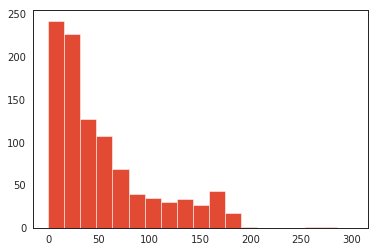

In [113]:
totalNumWords = [len(one_comment) for one_comment in x_train] # 각 document의 단어 길이를 check
plt.hist(totalNumWords,bins = np.arange(0,max(totalNumWords),max(totalNumWords)/20))

In [0]:
#https://keras.io/preprocessing/sequence/
# https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/sequence.py
# each comment_text is now a list of word
# we want the length of this list is a constant -> MAX_LEN
# if the list is longer, then we cut/trim it 
# if shorter, then we add/pad it with 0's at the beginning
x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN) # MAX_LEN= 200
x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

In [0]:
#crawl-300d-2M.vec--> https://fasttext.cc/docs/en/english-vectors.html
#When pre-train embedding is helpful? https://www.aclweb.org/anthology/N18-2084
#There are many pretrained word embedding models: 
#fasttext, GloVe, Word2Vec, etc
#crawl-300d-2M.vec is trained from Common Crawl (a website that collects almost everything)
#it has 2 million words. Each word is represent by a vector of 300 dimensions.

#https://nlp.stanford.edu/projects/glove/
#GloVe is similar to crawl-300d-2M.vec. Probably, they use different algorithms.
#glove.840B.300d.zip: Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download)
#tokens mean words. It has 2.2M different words and 840B (likely duplicated) words in total

#note that these two pre-trained models give 300d vectors.

# 300차원의 pre-trained word vector 사용
EMBEDDING_FILES = [
    '/gdrive/My Drive/data/crawl-300d-2M.vec',
    '/gdrive/My Drive/data/glove.840B.300d.txt'
]

#we will convert each word in a comment_text to a number.
#So a comment_text is a list of number. How many numbers in this list?
#we want the length of this list is a constant -> MAX_LEN
# 상기 Histogram을 바탕으로 200개의 단어길이면 대부분의 단어 길이 cover 가능
# 신경망 학습을 위한 input 벡터 길이로 사용
MAX_LEN = 200

NUM_MODELS = 2

# the maximum number of different words to keep in the original texts
# 40_000 is a normal number
# 100_000 seems good too

MAX_FEATURES = 100000

#this is the number of training sample to put in the model each step
BATCH_SIZE = 512

#units parameters in Keras.layers.LSTM/cuDNNLSTM
#it it the dimension of the output vector of each LSTM cell.
LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS

EPOCHS = 4

In [0]:
def get_coefs(word, *arr):
    print("get_coefs function in....")
    print(word, np.asarray(arr, dtype='float32'))
    return word, np.asarray(arr, dtype='float32')


def load_embeddings(path):
    # each line in the file looks like 
    # apple 0.3 0.4 0.5 0.6 ...
    # that is a word followed by 300 float numbers
    with open(path) as f:
        # return dict(get_coefs(*line.strip().split(' ')) for line in f)
        # get_coef 함수가 가변인자를 담고 있기 때문에 리스트 데이터를 모두
        # unpacking 해서 전달해야 함. 만약 o.strip().split(" ")을 전달하면,
        # 이 자체가 하나의 값으로 쓰여 word에만 해당 값이 하나로 전달 된다.
        return dict(get_coefs(*o.strip().split(" ")) for o in tqdm(f))
        # word와 그에 따르는 

def build_matrix(word_index, path):
    # path: a path that contains embedding matrix
    # word_index is a dict of the form ('apple': 123, 'banana': 349, etc)
    # that means word_index[word] gives the index of the word
    # word_index was built from all commment_texts

    # we will construct an embedding_matrix for the words in word_index
    # using pre-trained embedding word vectors from 'path'

    embedding_index = load_embeddings(path)

    #embedding_matrix is a matrix of len(word_index)+1  x 300
    embedding_matrix = np.zeros((len(word_index) + 1, 300))

    # word_index is a dict. Each element is (word:i) where i is the index
    # of the word
    for word, i in word_index.items():
        try:
            #RHS is a vector of 300d
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            pass
    return embedding_matrix


def build_model(embedding_matrix, num_aux_targets):
   # a simpler version can be found here
   # https://www.tensorflow.org/tutorials/keras/basic_text_classification

   # Trainable params of the model: 1,671,687
   # Recall that the number of samples in train.csv is 1_804_874

    #words is a vector of MAX_LEN dimension
    words = Input(shape=(MAX_LEN,))

    #Embedding is the keras layer. We use the pre-trained embbeding_matrix
    # https://keras.io/layers/embeddings/
    # have to say that parameters in this layer are not trainable
    # x is a vector of 600 dimension
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)

    #*embedding_matrix.shape is a short way for 
    #input_dim = embedding_matrix.shape[0], output_dim  = embedding_matrix.shape[1]

    #here the author used pre-train embedding matrix.
    #instead of train from begining like in tensorflow example

    #https://stackoverflow.com/questions/50393666/how-to-understand-spatialdropout1d-and-when-to-use-it
    x = SpatialDropout1D(0.25)(x)

    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)

    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)

    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])

    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='tanh')(hidden)])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid', name = 'main_output')(hidden)

    #num_aux_targets = 6 since y_aux_train has 6 columns
    aux_result = Dense(num_aux_targets, activation='sigmoid', name = 'aux_ouput')(hidden)

    model = Model(inputs=words, outputs=[result, aux_result])

    #model.summary() will gives a good view of the model structure

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(clipnorm=0.1),
        metrics=['accuracy'])
    return model

In [51]:
# create an embedding_matrix 
#after this, embedding_matrix is a matrix of size
# len(tokenizer.word_index)+1 x 600
# we concatenate two matrices, 600 = 300+300
embedding_matrix = np.concatenate(
    [build_matrix(tokenizer.word_index, f) for f in EMBEDDING_FILES], axis=-1)
#embedding_matrix.shape 
#== (410047, 600)

#embedding_matrix[i] is a 600d vector representation of the word whose index is i
#embedding_matrix[10]
#tokenizer.index_word[10] == 'you'


checkpoint_predictions = []
weights = []


#https://keras.io/callbacks/#learningratescheduler

for model_idx in range(NUM_MODELS):
  # build the same models
    model = build_model(embedding_matrix, y_aux_train.shape[-1])
  # We train each model EPOCHS times
  # After each epoch, we reset learning rate (we are using Adam Optimizer)  
  # https://towardsdatascience.com/learning-rate-scheduler-d8a55747dd90

  # https://github.com/keras-team/keras/blob/master/keras/callbacks.py#L921
  # learningrate is the attribute 'lr' from Adam optimizer
  # see https://github.com/keras-team/keras/blob/master/keras/optimizers.py#L460
  # In Adam Optimizer, learning rate is changing after each batch
    for global_epoch in range(EPOCHS):
        model.fit(
            x_train,
            [y_train, y_aux_train],
            batch_size=BATCH_SIZE,
            epochs=1,
            verbose=1,
            callbacks=[
                LearningRateScheduler(lambda epoch: 1e-3 * (0.6 ** global_epoch), verbose = 1)
            ]
        )
        #model.predict will give two outputs: main_output (target) and aux_output
        #we only take main_output
        checkpoint_predictions.append(model.predict(x_test, batch_size=2048)[0].flatten())
        weights.append(2 ** global_epoch)


#take average (with weights) of predictions from two models
#predictions is an np.array
predictions = np.average(checkpoint_predictions, weights=weights, axis=0)

FileNotFoundError: ignored

In [0]:
submission = pd.DataFrame.from_dict({
    'id': test['id'],
    'prediction': predictions
})

submission.to_csv('submission.csv', index=False)